<a href="https://colab.research.google.com/github/rmd-davis/ML-intro/blob/main/04_housing_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Intro to Machine Learning - Clustering
Using the The Ames Housing dataset compiled by Dean De Cock.

In this notebook, we will look at how to apply clustering.

In [1]:
# Import necessary packages

# Pandas to handle the data
import pandas as pd

# Matplotlib and Seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_theme(style = 'darkgrid')
sns.set_context('notebook')

# Scipy for linear regression
import scipy

# SciKit-Learn for machine learning
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

## Load data

In [2]:
# included_columns = ['SalePrice','LotArea','BldgType','HouseStyle',
#                     'OverallCond','YearBuilt','RoofMatl','GrLivArea',
#                     'Fireplaces','GarageArea','PoolArea','MiscVal']

included_columns = ['SalePrice','OverallCond','YearBuilt','GrLivArea','Fireplaces','GarageArea','PoolArea','MiscVal']

data = pd.read_csv('https://raw.githubusercontent.com/rmd-davis/ML-intro/main/data/housing_data.csv', usecols = included_columns)

data

,OverallCond,YearBuilt,GrLivArea,Fireplaces,GarageArea,PoolArea,MiscVal,SalePrice
0,5,2002,2031,1,577.0,0,0,237000
1,5,2006,1352,1,466.0,0,0,194000
2,5,2006,1140,0,0.0,0,0,84500
3,5,2001,1419,1,588.0,0,0,290000
4,6,1975,1074,0,495.0,0,0,153500
...,...,...,...,...,...,...,...,...
2046,5,2000,1792,1,451.0,0,0,186500
2047,5,1996,2013,1,455.0,0,0,269790
2048,5,2006,1412,1,432.0,0,0,156932
2049,7,1966,1165,0,490.0,0,0,174900


## Data Cleaning

In [3]:
# Check for missing values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallCond  2051 non-null   int64  
 1   YearBuilt    2051 non-null   int64  
 2   GrLivArea    2051 non-null   int64  
 3   Fireplaces   2051 non-null   int64  
 4   GarageArea   2050 non-null   float64
 5   PoolArea     2051 non-null   int64  
 6   MiscVal      2051 non-null   int64  
 7   SalePrice    2051 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 128.3 KB


In [4]:
# Fix the missing value in 'GarageArea' with the mean value in the column

data['GarageArea'] = data['GarageArea'].fillna(data['GarageArea'].mean())

### Min max scale

In [5]:
# We have to scale the data so that the K-Means algorithm will work well

scaler = MinMaxScaler()
data_scaled = data.copy()
data_scaled[data_scaled.columns] = scaler.fit_transform(data_scaled[data_scaled.columns])
data_scaled

,OverallCond,YearBuilt,GrLivArea,Fireplaces,GarageArea,PoolArea,MiscVal,SalePrice
0,0.500,0.942029,0.409705,0.25,0.415108,0.0,0.0,0.306211
1,0.500,0.971014,0.245775,0.25,0.335252,0.0,0.0,0.247485
2,0.500,0.971014,0.194592,0.00,0.000000,0.0,0.0,0.097938
3,0.500,0.934783,0.261951,0.25,0.423022,0.0,0.0,0.378594
4,0.625,0.746377,0.178658,0.00,0.356115,0.0,0.0,0.192173
...,...,...,...,...,...,...,...,...
2046,0.500,0.927536,0.352004,0.25,0.324460,0.0,0.0,0.237242
2047,0.500,0.898551,0.405360,0.25,0.327338,0.0,0.0,0.350993
2048,0.500,0.971014,0.260261,0.25,0.310791,0.0,0.0,0.196860
2049,0.750,0.681159,0.200628,0.00,0.352518,0.0,0.0,0.221399


## K-Means

In [6]:
k_means = KMeans(n_clusters=5, random_state=42)
k_means.fit(data_scaled)

KMeans(n_clusters=5, random_state=42)

In [7]:
# Let's look at the clusters
# In the case of K-Means, the cluster centers *are* the feature means - that's how K-Means is defined! Sweet!
# We just have to 'unscale' the values

# 'Unscale' the values
clusters = scaler.inverse_transform(k_means.cluster_centers_)

# Create a dataframe of the clusters and name the columns
clusters  = pd.DataFrame(clusters)
clusters.columns = data_scaled.columns

# Round the values and sort by sale price 
clusters.round(0).sort_values(by='SalePrice', ascending=False)

,OverallCond,YearBuilt,GrLivArea,Fireplaces,GarageArea,PoolArea,MiscVal,SalePrice
4,5.0,2001.0,2188.0,1.0,771.0,7.0,36.0,324144.0
1,5.0,2001.0,1522.0,0.0,507.0,1.0,29.0,195595.0
2,6.0,1962.0,1531.0,1.0,465.0,4.0,51.0,171203.0
3,6.0,1962.0,1138.0,0.0,380.0,1.0,99.0,126007.0
0,6.0,1919.0,1346.0,0.0,293.0,-0.0,31.0,120438.0


## Hyperparameter tuning

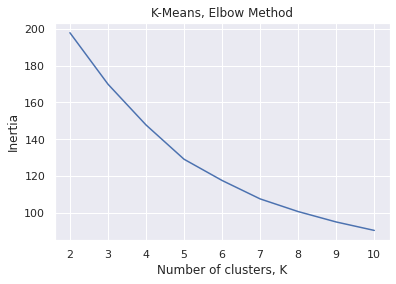

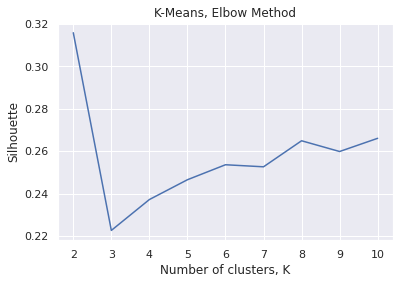

In [8]:
'''
    To select the correct number of clusters, you can use the 'elbow method'.
    When plotting Inertia vs # of clusters, the 'elbow' is where you start to see diminishing returns for having more clusters.
    
    Inertia is a measure of how good your clustering is. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

    Silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). Ideally, you want clusters that are well-defined and distinct from other clusters.

'''

X = data_scaled

inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");


plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");